In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import numpy as np
from sklearn.manifold import SpectralEmbedding
from scipy import linalg

In [16]:
# create points whose values are set between -1 and 1 at random - Pearson correlation coefficient
x = []
random.seed(10)
for i in range(100):
    x.append(random.uniform(-1,1))
x[:5]

[0.142805189379827,
 -0.14222189064977075,
 0.15618260226894076,
 -0.5878035357209965,
 0.6266425027146401]

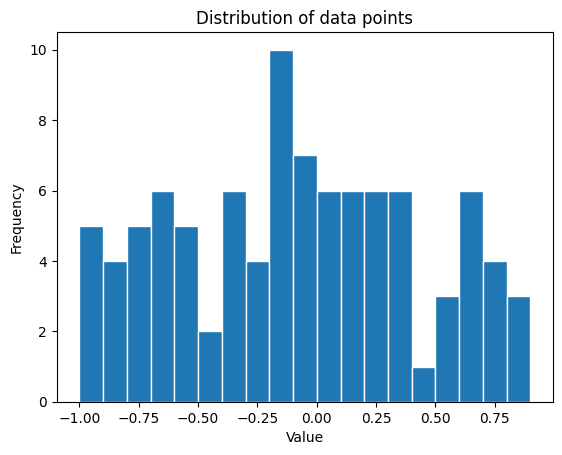

In [17]:
plt.hist(x, edgecolor='white', bins=np.arange(-1, 1, 0.1))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of data points')
plt.show()

In [18]:
# Create a complete graph with 5 nodes
G = nx.complete_graph(10)

# Generate random weights between 0 and 2 for the edges
weights = {(u, v): random.uniform(0, 2) for u, v in G.edges}
print(weights) # it takes the form of the upper triangular matrix

{(0, 1): 0.8303473864356654, (0, 2): 0.07063565957566231, (0, 3): 0.005660853364740648, (0, 4): 1.0708369026324258, (0, 5): 0.10114588364419275, (0, 6): 0.18548681068438344, (0, 7): 0.21751282525393822, (0, 8): 0.9081566606976395, (0, 9): 1.9853761315275076, (1, 2): 0.9701107016101427, (1, 3): 0.9172805676167688, (1, 4): 0.8730216290742374, (1, 5): 1.0022243696845112, (1, 6): 0.8941749385480484, (1, 7): 1.452430401133322, (1, 8): 1.7958830712546376, (1, 9): 1.3957406946755344, (2, 3): 0.8466212053354809, (2, 4): 1.2990582364747507, (2, 5): 1.8190811950473371, (2, 6): 0.30725468307198955, (2, 7): 0.4746849138000886, (2, 8): 1.238224000228935, (2, 9): 1.3740398912963017, (3, 4): 1.2852004454235588, (3, 5): 1.1770571257966558, (3, 6): 1.6588463876907418, (3, 7): 0.9578859064713536, (3, 8): 1.6151777225192767, (3, 9): 1.924711693767913, (4, 5): 0.8707133658411301, (4, 6): 1.7176911569616276, (4, 7): 1.4364847583966152, (4, 8): 1.777362988725999, (4, 9): 0.0924717723912869, (5, 6): 1.826197

In [19]:
# To calculate weights according to the Gaussian similarity function
# transversing the upper triangular part of x_df is just enought
gaussian_weights = []
for i in range(100):
    for j in range(100):
        gaussian_weights.append(math.exp(-math.pow(x[i]-x[j],2)))
S = np.array(gaussian_weights).reshape(100,100)
S = pd.DataFrame(S)
S

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.921972,0.999821,0.586379,0.791284,0.775388,0.973418,0.508519,0.989757,0.788658,...,0.973452,0.952785,0.890501,0.912868,0.999268,0.995723,0.973777,0.517852,0.934580,0.531894
1,0.921972,1.000000,0.914804,0.819925,0.553689,0.536252,0.817298,0.749228,0.966867,0.959927,...,0.985467,0.995770,0.996922,0.999714,0.907192,0.952939,0.985223,0.758152,0.999379,0.311770
2,0.999821,0.914804,1.000000,0.574925,0.801450,0.785782,0.977527,0.497364,0.986897,0.778305,...,0.969016,0.947026,0.882266,0.905361,0.999813,0.993802,0.969365,0.506643,0.927933,0.543225
3,0.586379,0.819925,0.574925,1.000000,0.228806,0.217582,0.449071,0.991620,0.673128,0.942501,...,0.725417,0.770435,0.858860,0.832134,0.563229,0.642487,0.724579,0.993524,0.801422,0.097675
4,0.791284,0.553689,0.801450,0.228806,1.000000,0.999578,0.902843,0.181570,0.709936,0.389446,...,0.657220,0.609401,0.506816,0.539325,0.811687,0.739531,0.658088,0.186905,0.574957,0.907971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.995723,0.952939,0.993802,0.642487,0.739531,0.722728,0.948644,0.563910,0.998705,0.837022,...,0.990333,0.976427,0.927126,0.945620,0.991474,1.000000,0.990531,0.573424,0.962824,0.477286
96,0.973777,0.985223,0.969365,0.724579,0.658088,0.640565,0.898499,0.647446,0.996219,0.900203,...,0.999999,0.996767,0.968974,0.980886,0.964515,0.990531,1.000000,0.656941,0.990616,0.399744
97,0.517852,0.758152,0.506643,0.993524,0.186905,0.177149,0.386234,0.999876,0.604267,0.900374,...,0.657809,0.704953,0.801294,0.771542,0.495242,0.573424,0.656941,1.000000,0.738073,0.075890
98,0.934580,0.999379,0.927933,0.801422,0.574957,0.557420,0.835279,0.728981,0.975146,0.949712,...,0.990811,0.998386,0.993551,0.998252,0.920839,0.962824,0.990616,0.738073,1.000000,0.328797


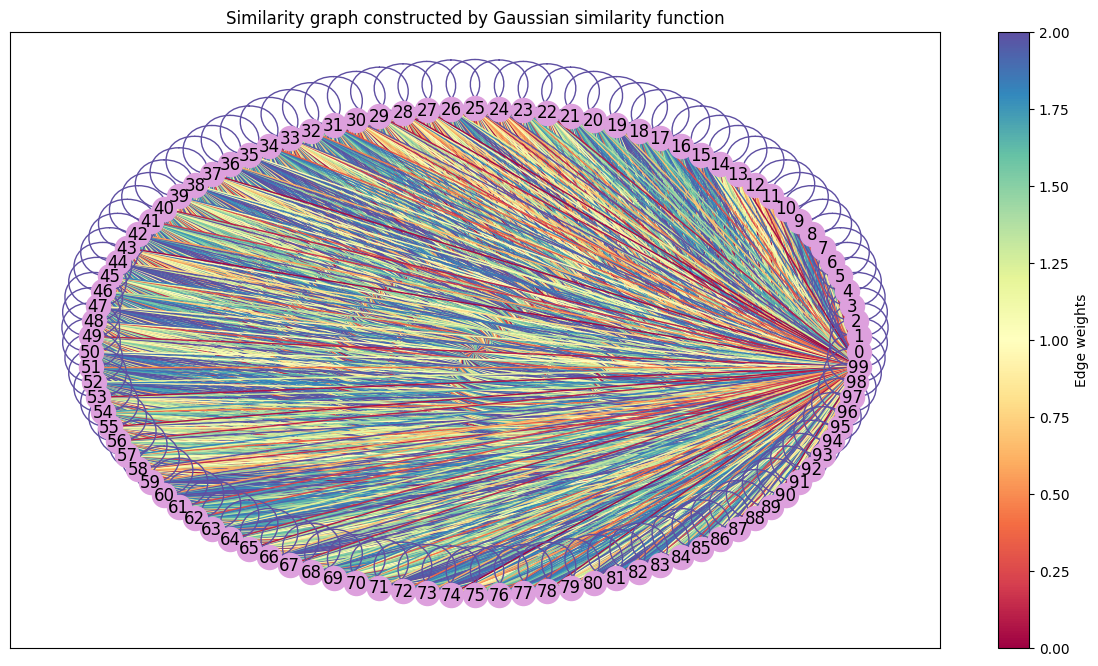

In [20]:
# from df to G
G = nx.from_pandas_adjacency(S)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
fig, axs = plt.subplots(figsize=(15,8))
nx.draw_networkx(G, ax=axs, pos=nx.circular_layout(G), node_color='plum', edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Spectral)
norm2 = mpl.colors.Normalize(vmin=0, vmax=2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=plt.cm.Spectral),
             ax=axs, orientation='vertical', label='Edge weights')
plt.title('Similarity graph constructed by Gaussian similarity function')
plt.show()

In [21]:
# construct a corresponding diagonal matrix
D = np.zeros((100,100))

# assigning values
for i in range(len(D)):
    for j in range(len(D[0])):
        if i==j:
            D[i,j] = 100
D

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 100.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 100.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 100.]])

In [22]:
# calculate Laplacian matrix -> its eigenvalues and vecotrs
# nx.laplacian_spectrum returns eigenvalues only
# to get its eigenvectors, use np.linalg.eig(A)

# normalized Laplacian matrix
L = nx.normalized_laplacian_matrix(G).toarray()
pd.DataFrame(L)

# is it alright to leave the self-loops?

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.986860,-0.012017,-0.013157,-0.008297,-0.011724,-0.011582,-0.013123,-0.007427,-0.012899,-0.010515,...,-0.012660,-0.012391,-0.011652,-0.011910,-0.013172,-0.013006,-0.012664,-0.007532,-0.012168,-0.009156
1,-0.012017,0.987070,-0.011942,-0.011508,-0.008138,-0.007946,-0.010930,-0.010855,-0.012500,-0.012696,...,-0.012713,-0.012846,-0.012940,-0.012939,-0.011862,-0.012347,-0.012710,-0.010939,-0.012907,-0.005323
2,-0.013157,-0.011942,0.986820,-0.008147,-0.011893,-0.011755,-0.013198,-0.007275,-0.012881,-0.010393,...,-0.012621,-0.012335,-0.011562,-0.011830,-0.013199,-0.013001,-0.012626,-0.007381,-0.012099,-0.009365
3,-0.008297,-0.011508,-0.008147,0.984764,-0.003650,-0.003500,-0.006519,-0.015596,-0.009446,-0.013532,...,-0.010159,-0.010789,-0.012101,-0.011691,-0.007994,-0.009037,-0.010147,-0.015561,-0.011235,-0.001810
4,-0.011724,-0.008138,-0.011893,-0.003650,0.983293,-0.016836,-0.013724,-0.002990,-0.010433,-0.005855,...,-0.009638,-0.008936,-0.007478,-0.007934,-0.012064,-0.010892,-0.009651,-0.003066,-0.008441,-0.017623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.013006,-0.012347,-0.013001,-0.009037,-0.010892,-0.010731,-0.012713,-0.008187,-0.012939,-0.011094,...,-0.012803,-0.012623,-0.012059,-0.012264,-0.012992,0.987016,-0.012806,-0.008291,-0.012461,-0.008167
96,-0.012664,-0.012710,-0.012626,-0.010147,-0.009651,-0.009470,-0.011989,-0.009360,-0.012850,-0.011880,...,-0.012872,-0.012830,-0.012549,-0.012667,-0.012584,-0.012806,0.987128,-0.009458,-0.012765,-0.006810
97,-0.007532,-0.010939,-0.007381,-0.015561,-0.003066,-0.002929,-0.005764,-0.016166,-0.008718,-0.013289,...,-0.009470,-0.010149,-0.011606,-0.011143,-0.007226,-0.008291,-0.009458,0.983898,-0.010637,-0.001446
98,-0.012168,-0.012907,-0.012099,-0.011235,-0.008441,-0.008250,-0.011157,-0.010550,-0.012592,-0.012546,...,-0.012767,-0.012865,-0.012881,-0.012905,-0.012027,-0.012461,-0.012765,-0.010637,0.987100,-0.005608


[-1.06577074e-16  5.88219482e-01  8.80296391e-01  9.82133916e-01
  9.97567461e-01]


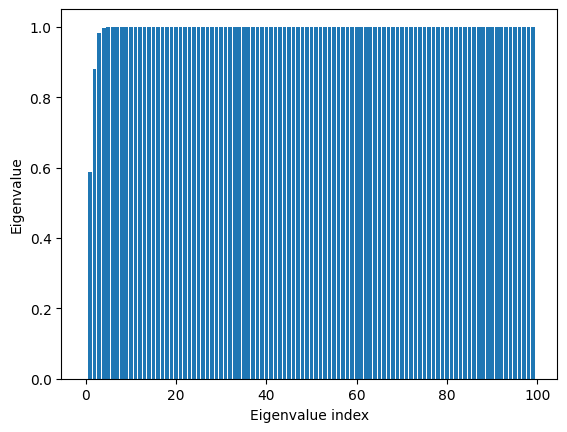

[-1.42108547e-14  3.13654228e+01  4.17441880e+01  4.31353781e+01
  4.43055517e+01]


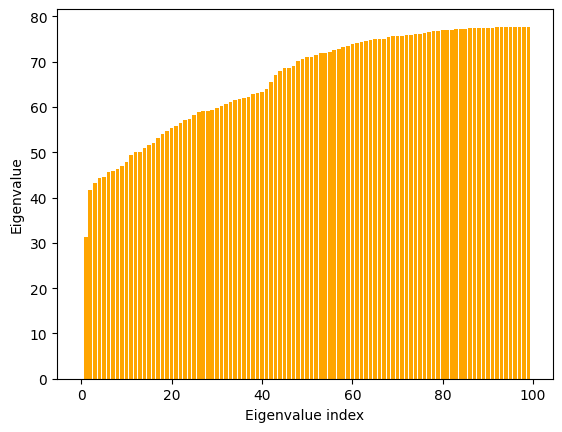

In [23]:
# eigenvalues of L calculated by NetworkX
L_spectrum = nx.normalized_laplacian_spectrum(G) # in the ascending order
print(L_spectrum[:5])
plt.bar(range(len(L_spectrum)), L_spectrum)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show()

L_spectrum_unn = nx.laplacian_spectrum(G) # unnormalized
print(L_spectrum_unn[:5])
plt.bar(range(len(L_spectrum_unn)), L_spectrum_unn, color='orange')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show()

# note that eigenvalues of the unnormalized Laplacian are quite high
# note that the first eigenvalue approximates zero

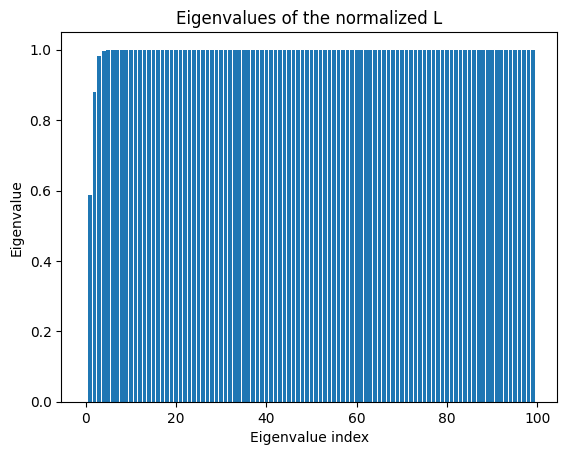

[0.         0.58821948 0.88029639 0.98213392 0.99756746]
[1. 1. 1. 1. 1.]


In [44]:
# eigenvalues and vectors calculated by numpy
L_value, L_vector = np.linalg.eig(L)

plt.bar(range(len(L_value)), sorted(L_value))
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the normalized L')
plt.show()

print(L_value[:5])
print(L_value[-5:])
# both give the same results

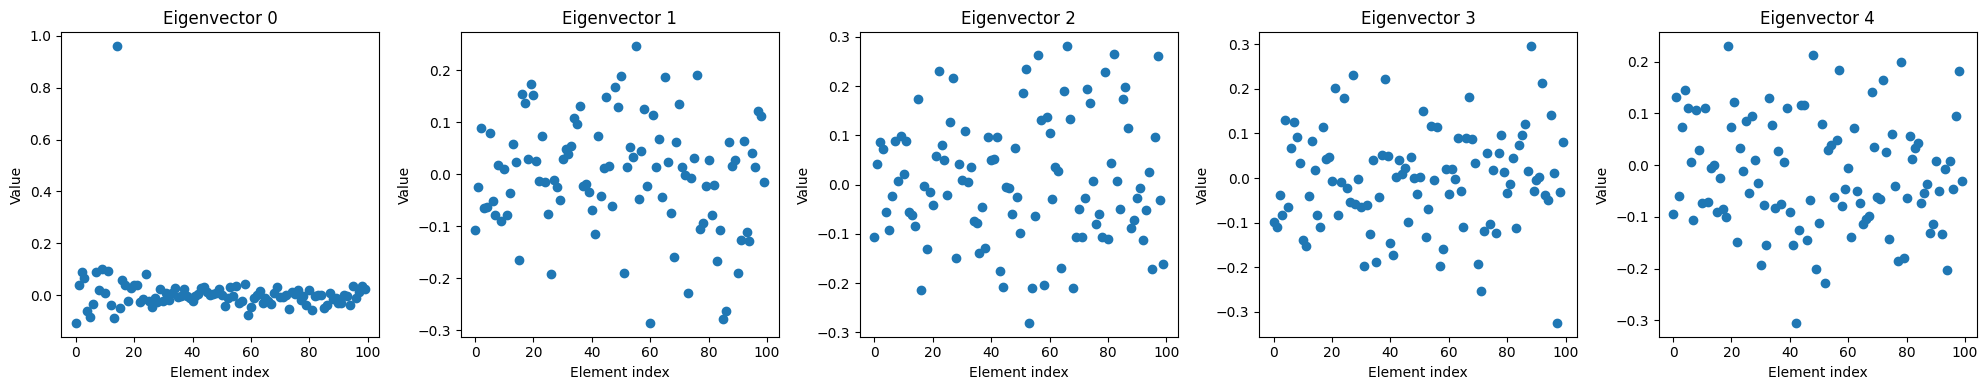

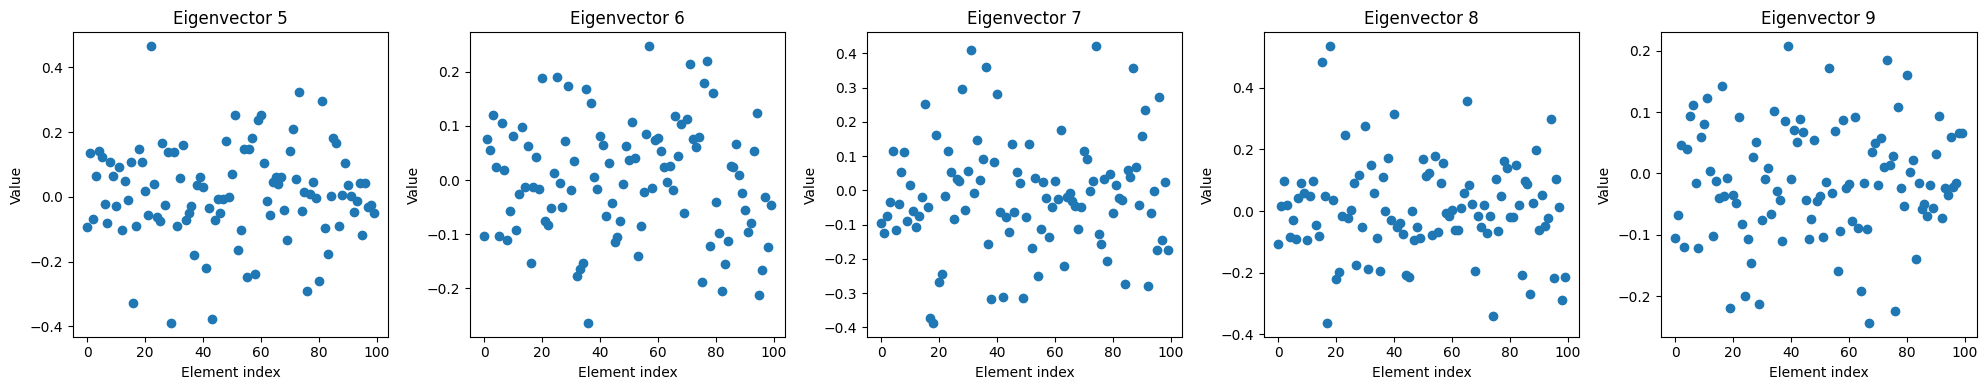

In [25]:
# visualize its eigenvectors
# Specify the number of plots per row
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[run_number-1]
        # axes[col].scatter(x, temp_vector)
        axes[col].scatter(range(len(temp_vector)), temp_vector)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

# not the identity matrix! -> it might not concern the generalized eigenvalue problem

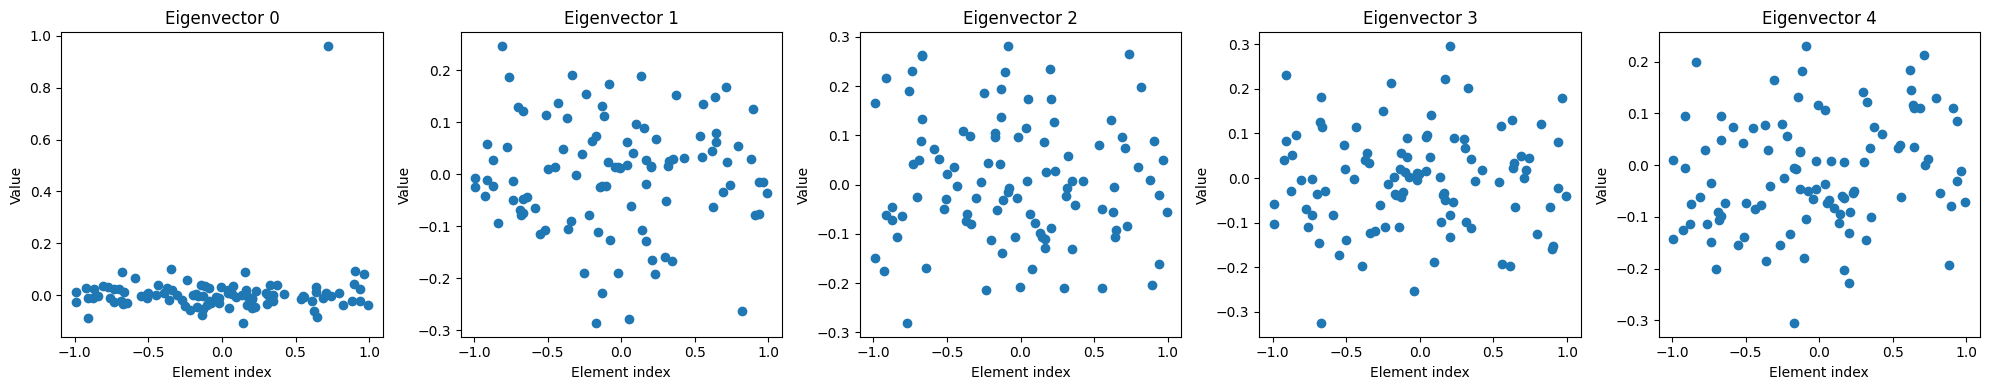

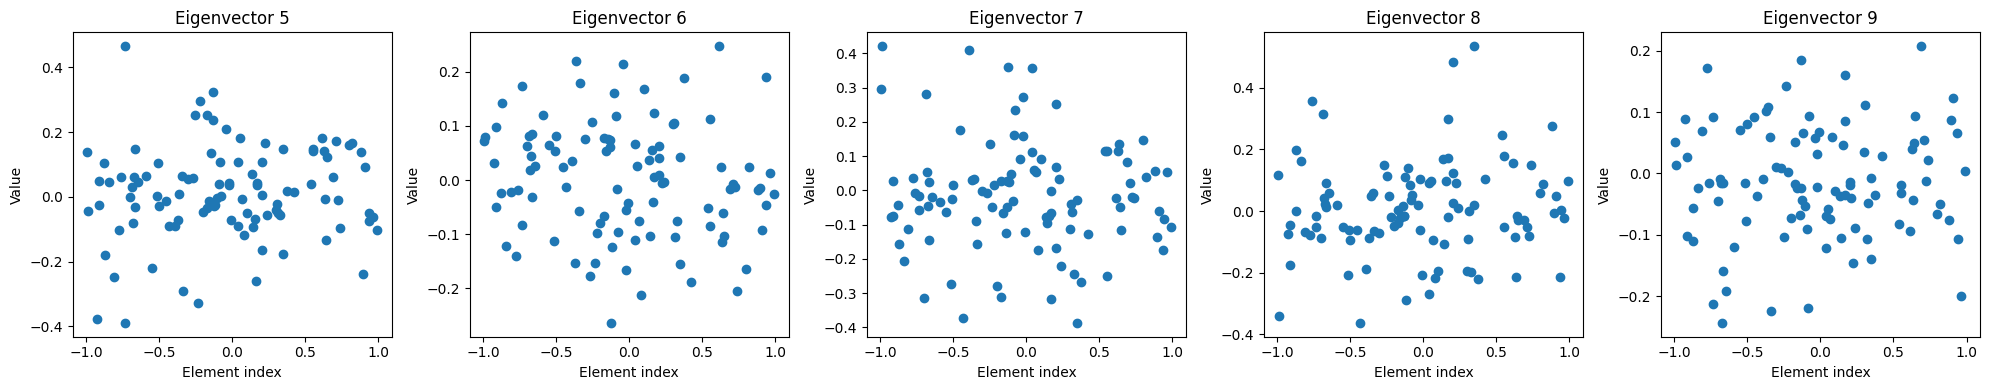

In [26]:
# visualize its eigenvectors
# Specify the number of plots per row
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[run_number-1]
        axes[col].scatter(x, temp_vector)
        # axes[col].scatter(range(len(temp_vector)), temp_vector)
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

# not the identity matrix! -> it might not concern the generalized eigenvalue problem

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


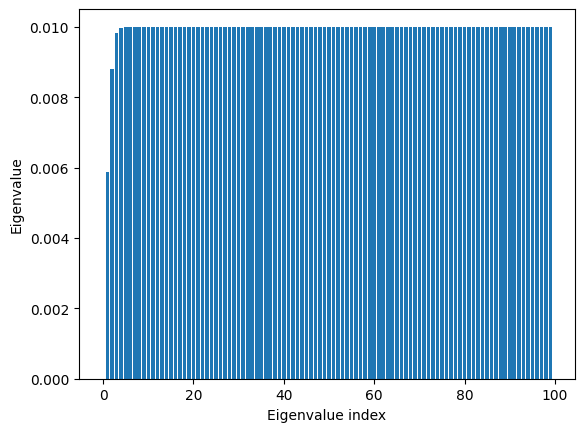

[1.11253071e-18+0.j 5.88219482e-03+0.j 8.80296391e-03+0.j
 9.82133916e-03+0.j 9.97567461e-03+0.j]


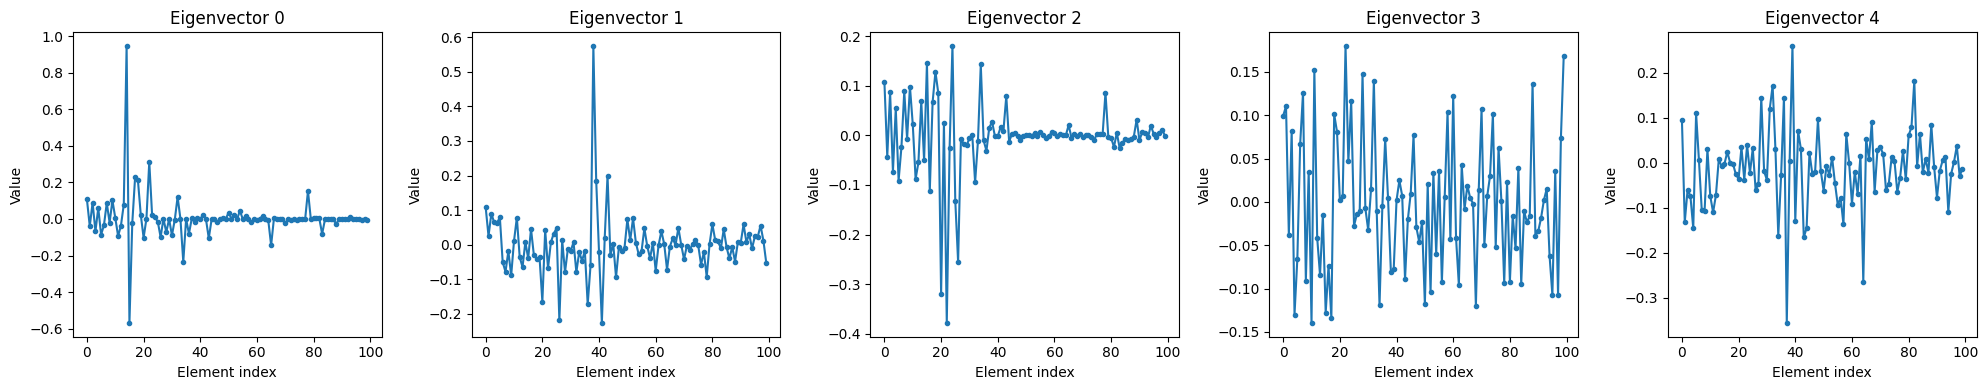

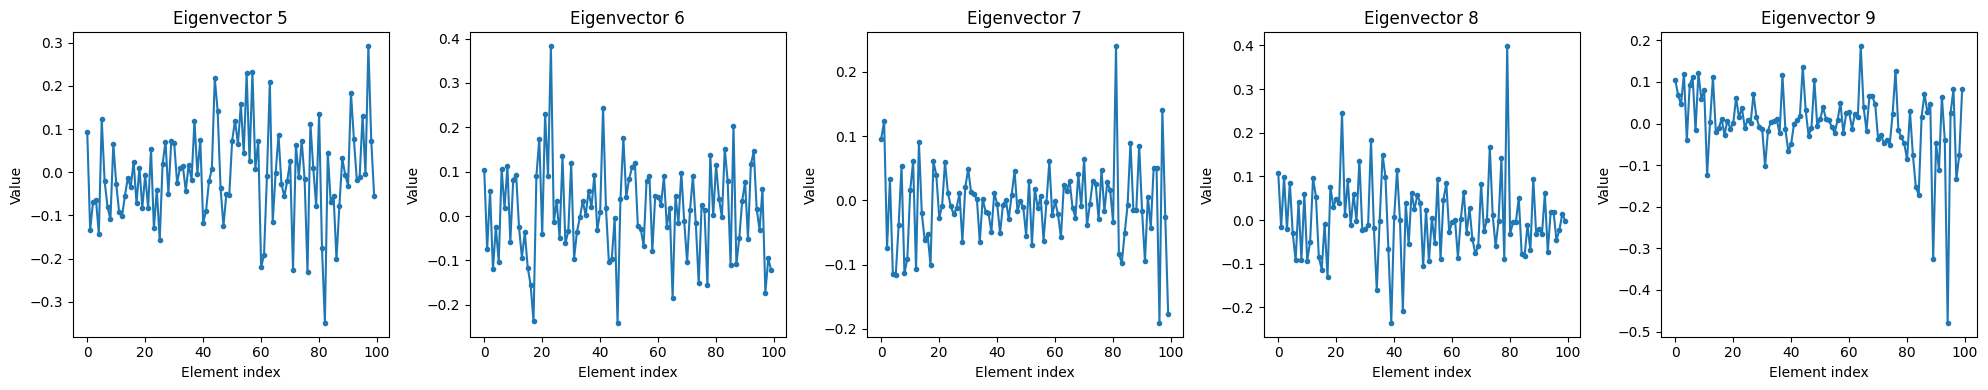

In [27]:
# solve generalized eigenvalue problem by SciPy
L_value, L_vector = linalg.eig(L, D)

plt.bar(range(len(L_value)), sorted(L_value))
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show()

print(L_value[:5])
# both give the same results

# visualize its eigenvectors
# Specify the number of plots per row
plots_per_row = 5
total_plots = 10

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue
        
        # plot data
        temp_vector = L_vector[run_number-1]
        axes[col].plot(range(len(temp_vector)), temp_vector,'.-')
        axes[col].set_xlabel('Element index')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Eigenvector {run_number-1}')

    plt.tight_layout()
    plt.show()

# not the identity matrix! -> it might not concern the generalized eigenvalue problem

In [86]:
# implementation of projected inverse power iteration
p, l, u = linalg.lu(L)
print(p) # no permutation?
print(np.allclose(L, p @ l @ u))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
True


In [85]:
pl, u   = linalg.lu(L, permute_l=True)
np.allclose(L, pl @ u)

True

In [64]:
# create points whose values are set between -1 and 1 at random - Pearson correlation coefficient
x0 = []
random.seed(10)
for i in range(100):
    x0.append(round(random.uniform(0.1,1), 1))

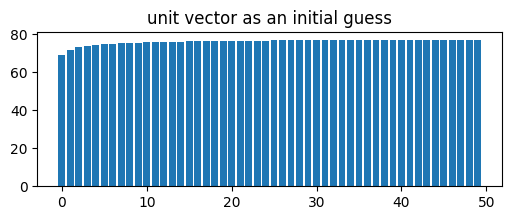

[68.829, 71.867, 73.078, 73.851, 74.372]
[77.077, 77.089, 77.101, 77.113, 77.124]


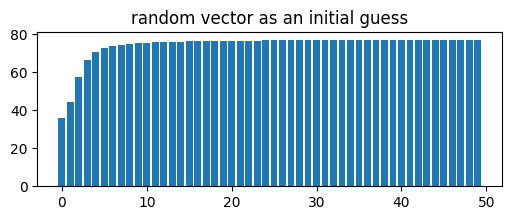

[35.955, 44.523, 57.574, 66.769, 70.924]
[77.267, 77.277, 77.287, 77.296, 77.305]


In [159]:
# 1. power method
# L = nx.normalized_laplacian_matrix(G).toarray()
L = nx.laplacian_matrix(G).toarray()

x0 = np.transpose(0.1*np.ones(100)) # initial guess
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 50 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('unit vector as an initial guess')
plt.show()
print(labmda_history[:5])
print(labmda_history[-5:])

##################################################################################################################

x0 = []
random.seed(10)
for i in range(100):
    x0.append(round(random.uniform(0.1,1), 1))
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 50 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('random vector as an initial guess')
plt.show()
print(labmda_history[:5])
print(labmda_history[-5:])

In [164]:
# 2. inverse power method
x0 = []
random.seed(10)
for i in range(100):
    x0.append(round(random.uniform(0.1,1), 1))
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 10 # total number of iterations
x_target = [i/sum(x0) for i in x0] # normalized x0
for i in range(1, k+1):
    xk = np.matmul(np.linalg.inv(L), x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk/xk.sum()

# plt.figure(figsize=(6,2))
# plt.bar(range(len(labmda_history)), labmda_history)
# plt.title('random vector as an initial guess')
# plt.show()

labmda_history

[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [89]:
# code from https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html is a bit modified
def plu_inverse(A):
    
    n = A.shape[0]
    
    b = np.eye(n)
    Ainv = np.zeros((n, n))
    
    P, L, U = linalg.lu(A)
    
    for i in range(n):
        
        y = forward_substitution(L, np.dot(P, b[i, :]))
        
        Ainv[i, :] = back_substitution(U, y)
        
    return Ainv

def forward_substitution(L, b):
    
    #Get number of rows
    n = L.shape[0]
    
    #Allocating space for the solution vector
    y = np.zeros_like(b, dtype=np.double);
    
    #Here we perform the forward-substitution.  
    #Initializing  with the first row.
    y[0] = b[0] / L[0, 0]
    
    #Looping over rows in reverse (from the bottom  up),
    #starting with the second to last row, because  the 
    #last row solve was completed in the last step.
    for i in range(1, n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]
        
    return y

def back_substitution(U, y):
    
    #Number of rows
    n = U.shape[0]
    
    #Allocating space for the solution vector
    x = np.zeros_like(y, dtype=np.double);

    #Here we perform the back-substitution.  
    #Initializing with the last row.
    x[-1] = y[-1] / U[-1, -1]
    
    #Looping over rows in reverse (from the bottom up), 
    #starting with the second to last row, because the 
    #last row solve was completed in the last step.
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
        
    return x
    
plu_inverse(L) # why are elements this high?

array([[-5.66851854e+14, -5.71439876e+14, -5.65992941e+14, ...,
        -5.12070392e+14, -5.72097486e+14, -4.32708419e+14],
       [-5.71439876e+14, -5.76065032e+14, -5.70574010e+14, ...,
        -5.16215020e+14, -5.76727965e+14, -4.36210702e+14],
       [-5.65992941e+14, -5.70574010e+14, -5.65135329e+14, ...,
        -5.11294485e+14, -5.71230624e+14, -4.32052765e+14],
       ...,
       [-5.12070392e+14, -5.16215020e+14, -5.11294485e+14, ...,
        -4.62583097e+14, -5.16809077e+14, -3.90890791e+14],
       [-5.72097486e+14, -5.76727965e+14, -5.71230624e+14, ...,
        -5.16809077e+14, -5.77391660e+14, -4.36712691e+14],
       [-4.32708419e+14, -4.36210702e+14, -4.32052765e+14, ...,
        -3.90890791e+14, -4.36712691e+14, -3.30309542e+14]])

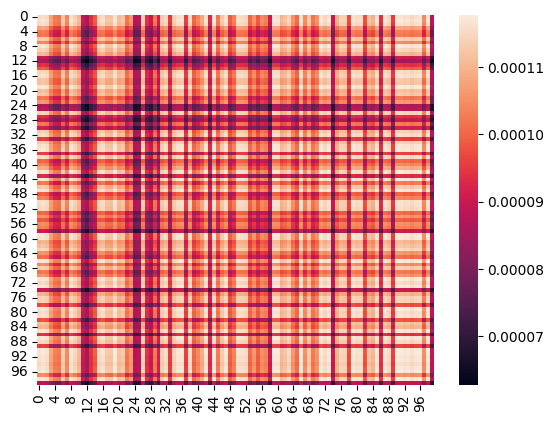

In [154]:
import seaborn as sns
sns.heatmap(pd.DataFrame(plu_inverse(L)/plu_inverse(L).sum()))
plt.show() # ~ null vector

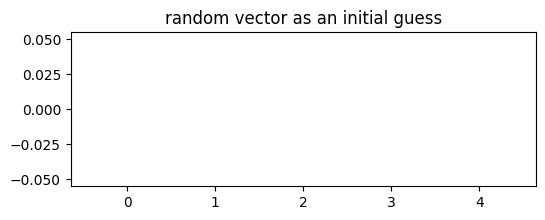

-0.0

In [155]:
# 3. get the inverse of L with LU factorization

x0 = []
random.seed(10)
for i in range(100):
    x0.append(round(random.uniform(0.1,1), 1))
xk = 0 # initial guess multiplied by L k times
labmda_history = []

k = 5 # total number of iterations
x_target = [i/sum(x0) for i in x0]
for i in range(1, k+1):
    normalized_inverse_L = plu_inverse(L)
    xk = np.matmul(normalized_inverse_L, x_target)
    labmda_history.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
    x_target = xk/xk.sum()

plt.figure(figsize=(6,2))
plt.bar(range(len(labmda_history)), labmda_history)
plt.title('random vector as an initial guess')
plt.show()

labmda_history[-1]

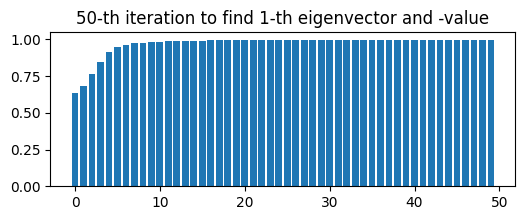

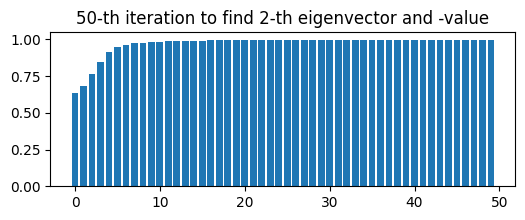

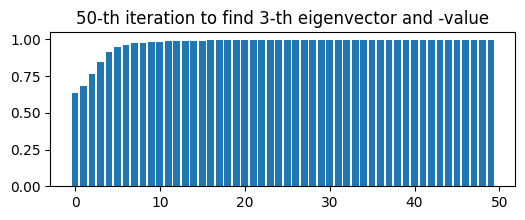

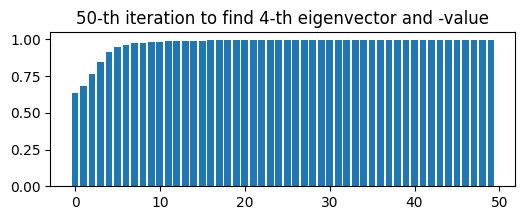

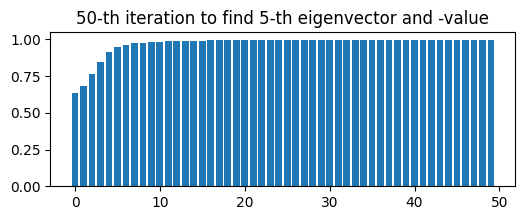

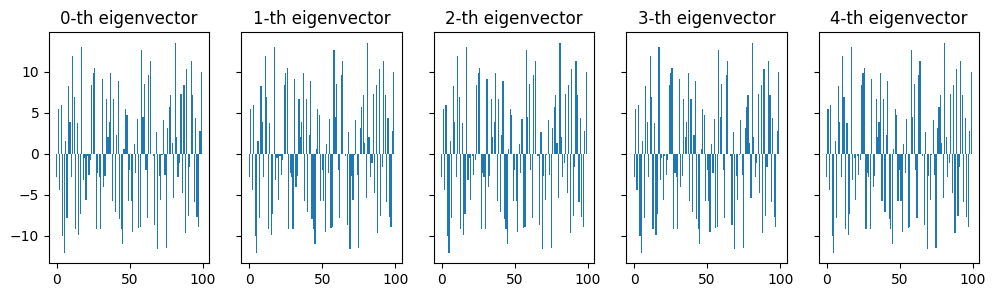

[0.632, 0.683, 0.763, 0.849, 0.911, 0.946, 0.963, 0.972, 0.977, 0.981, 0.984, 0.986, 0.987, 0.989, 0.99, 0.991, 0.992, 0.992, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994, 0.995, 0.995, 0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.998]
[0.998, 0.998, 0.998, 0.998, 0.998]


In [138]:
# 4. deflation method

v = 5 # number of eigenvectors you wish to get
Pk = 0 # matrix after k times projection

val_k = 0 # k-th eigenvalue
vec_k = 0 # k-th eigenvector
vals = [] # eigenvalue list
vecs = [] # eigenvector list

k = 50 # total number of iterations
labmda_history = []

# projection
for j in range(1, v+1):
    if j == 1:
        Pk = L
    else:
        Pk = L - val_k*np.matmul(vec_k, np.transpose(vec_k))

    # initialize variable for power method
    labmda_history_elem = []
    x0 = []
    random.seed(10)
    for i in range(100):
        x0.append(round(random.uniform(0.1,1), 1))
    xk = 0 # initial guess multiplied by L k times
    x_target = x0
    
    # power method
    for i in range(1, k+1):
        xk = np.matmul(L, x_target)
        labmda_history_elem.append(np.round(np.matmul(np.matmul(L, xk), xk) / np.matmul(xk,xk), 3))
        x_target = xk
    
    plt.figure(figsize=(6,2))
    plt.bar(range(len(labmda_history_elem)), labmda_history_elem)
    plt.title(f'{i}-th iteration to find {j}-th eigenvector and -value')
    plt.show()

    # store and update variables
    vec_k = x_target/x_target.sum() # normalization
    val_k = labmda_history_elem[-1]
    vecs.append(vec_k)
    vals.append(val_k)
    labmda_history.append(labmda_history_elem)

# display results
fig, axs = plt.subplots(1,5, sharex=True, sharey=True, figsize=(12,3))
for i in range(5):
    axs[i].bar(range(len(vecs[0])), vecs[0])
    axs[i].set_title(f'{i}-th eigenvector')
plt.show()

print(labmda_history[0])
print(vals)

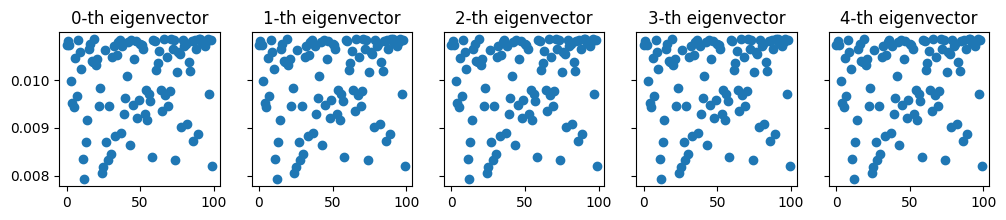

[array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.]), array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
        0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0

In [146]:
# 5. inverse deflation method

v = 5 # number of eigenvectors you wish to get
Pk = 0 # matrix after k times projection

val_k = 0 # k-th eigenvalue
vec_k = 0 # k-th eigenvector
vals = [] # eigenvalue list
vecs = [] # eigenvector list

k = 5 # total number of iterations

# projection
for j in range(1, v+1):
    if j == 1:
        Pk = L
    else:
        Pk = L - val_k*np.matmul(vec_k, np.transpose(vec_k))

    # initialize variable for power method
    labmda_history = []
    x0 = []
    for i in range(100):
        x0.append(round(random.uniform(0.1,1), 1))
    xk = 0 # initial guess multiplied by L k times
    x_target = [i/sum(x0) for i in x0] # normalized x0
    
    # power method
    for i in range(1, k+1):
        xk = np.matmul(np.linalg.inv(L), x_target)
        labmda_history.append(np.round(np.matmul(L, xk) / np.matmul(xk,xk), 3))
        x_target = xk/xk.sum()
    
    # plt.figure(figsize=(6,2))
    # plt.bar(range(len(labmda_history)), labmda_history)
    # plt.title(f'{i}-th iteration to find {j}-th eigenvector and -value')
    # plt.show()

    # store and update variables
    vec_k = x_target/x_target.sum() # normalization
    val_k = labmda_history[-1]
    vecs.append(vec_k)
    vals.append(val_k)

# display results
fig, axs = plt.subplots(1,5, sharex=True, sharey=True, figsize=(12,2))
for i in range(5):
    axs[i].scatter(range(len(vecs[0])), vecs[0])
    axs[i].set_title(f'{i}-th eigenvector')
plt.show()

print(vals)